# EDA-Project 2

Это ваш второй проект из второго блока курса Data Science. 
Вам предоставляется следующий файл: ```"houses_to_rent.csv"```.

Сделайте EDA по данным. 
Перечислите вопросы, которые вы считаете важными. Затем попробуйте ответить на каждый вопрос, с визуализации. Пожалуйста, сделайте ваш код чистым, а аргументы понятными.


Вопросы
1) Построить график корреляции для изучения данных

2) Влияет ли  характеристика домов на  арендную плату?

3) Как влияет страховани и налоги на общую стоимость домов?

4) Где больше спрос на аренду жилья в городе или за городом?

5) Как влияет количество комнат на страхование от пожара?

6) Где жить дороже в городе или за городом?

7) Какая средняя плошадь домов в городе и за городом?

8) Какое количество домов в городе и за городом?

9) Сколько стоит 1м2 в городе и за его пределами?

10) Какое количество квартир однокомнат, двухкомнат... в городе и за городом?

In [1]:
import os
from datetime import datetime
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Подготовка данных

In [2]:
data = pd.read_csv("houses_to_rent.csv")

data

In [3]:
data.drop(columns="Unnamed: 0", axis=1, inplace=True)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6080 entries, 0 to 6079
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   city            6080 non-null   int64 
 1   area            6080 non-null   int64 
 2   rooms           6080 non-null   int64 
 3   bathroom        6080 non-null   int64 
 4   parking spaces  6080 non-null   int64 
 5   floor           6080 non-null   object
 6   animal          6080 non-null   object
 7   furniture       6080 non-null   object
 8   hoa             6080 non-null   object
 9   rent amount     6080 non-null   object
 10  property tax    6080 non-null   object
 11  fire insurance  6080 non-null   object
 12  total           6080 non-null   object
dtypes: int64(5), object(8)
memory usage: 617.6+ KB


In [5]:
pd_data = data.copy()
for column in pd_data.columns.tolist():
    if pd_data[column].dtype == object:
        pd_data[column] = pd_data[column].str.replace("R", "").str.replace("$", "").str.replace(",","").str.strip()
        pd_data[column] = pd_data[column].replace({"Sem info":"0"})
        pd_data[column] = pd_data[column].replace({"-":"0"})
        pd_data[column] = pd_data[column].replace({"Incluso":"0"})
        pd_data[column] = pd_data[column].replace({"not acept":"0"})
        pd_data[column] = pd_data[column].replace({"acept":"1"})
        pd_data[column] = pd_data[column].replace({"not furnished":"0"})
        pd_data[column] = pd_data[column].replace({"furnished":"1"})
        pd_data[column] = pd.to_numeric(pd_data[column])

In [6]:
pd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6080 entries, 0 to 6079
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   city            6080 non-null   int64
 1   area            6080 non-null   int64
 2   rooms           6080 non-null   int64
 3   bathroom        6080 non-null   int64
 4   parking spaces  6080 non-null   int64
 5   floor           6080 non-null   int64
 6   animal          6080 non-null   int64
 7   furniture       6080 non-null   int64
 8   hoa             6080 non-null   int64
 9   rent amount     6080 non-null   int64
 10  property tax    6080 non-null   int64
 11  fire insurance  6080 non-null   int64
 12  total           6080 non-null   int64
dtypes: int64(13)
memory usage: 617.6 KB


In [7]:
pd_data

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,1,240,3,3,4,0,1,1,0,8000,1000,121,9121
1,0,64,2,1,1,10,1,0,540,820,122,11,1493
2,1,443,5,5,4,3,1,1,4172,7000,1417,89,12680
3,1,73,2,2,1,12,1,0,700,1250,150,16,2116
4,1,19,1,1,0,0,0,0,0,1200,41,16,1257
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6075,1,50,2,1,1,2,1,0,420,1150,0,15,1585
6076,1,84,2,2,1,16,0,1,768,2900,63,37,3768
6077,0,48,1,1,0,13,1,0,250,950,42,13,1255
6078,1,160,3,2,2,0,0,0,0,3500,250,53,3803


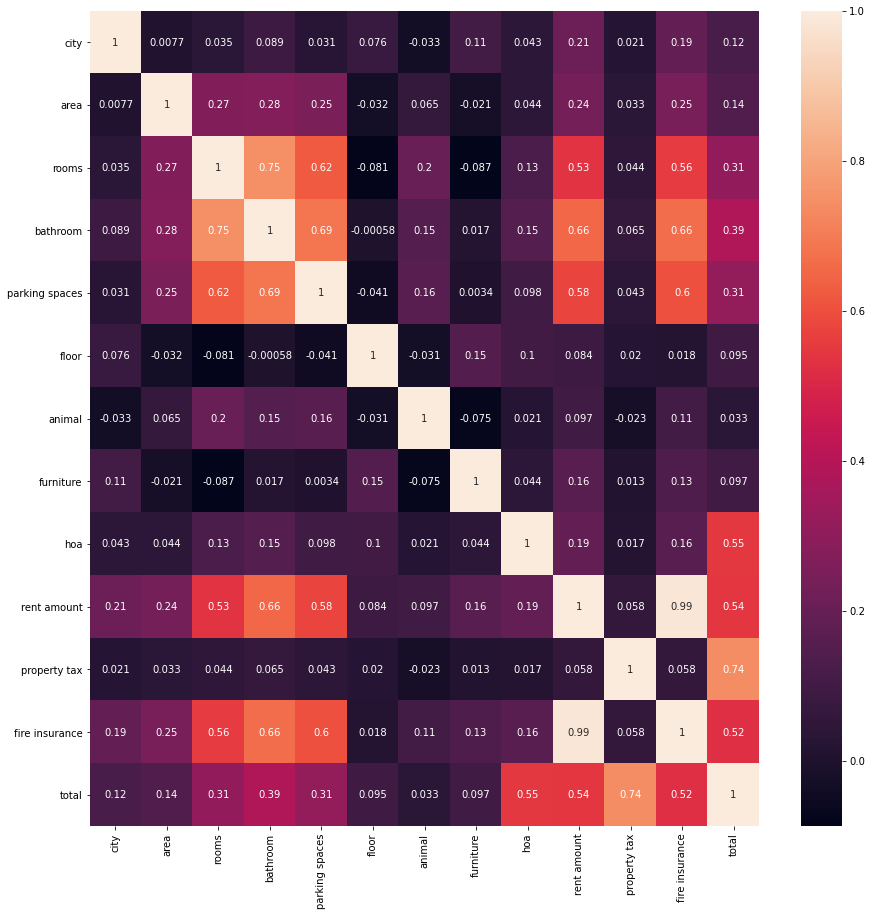

In [8]:
plt.figure(figsize=(15,15))
sns.heatmap(pd_data.corr(), annot=True);

В этом графике  можно увидеть корреляцию между арендной платой с характеристикой домов(плошадь, количество комнат...) а также страхование и налоги к обшей стоимости домов.

In [9]:
pd_data["city"] = pd_data["city"].replace({0:"out_city", 1:"city"})

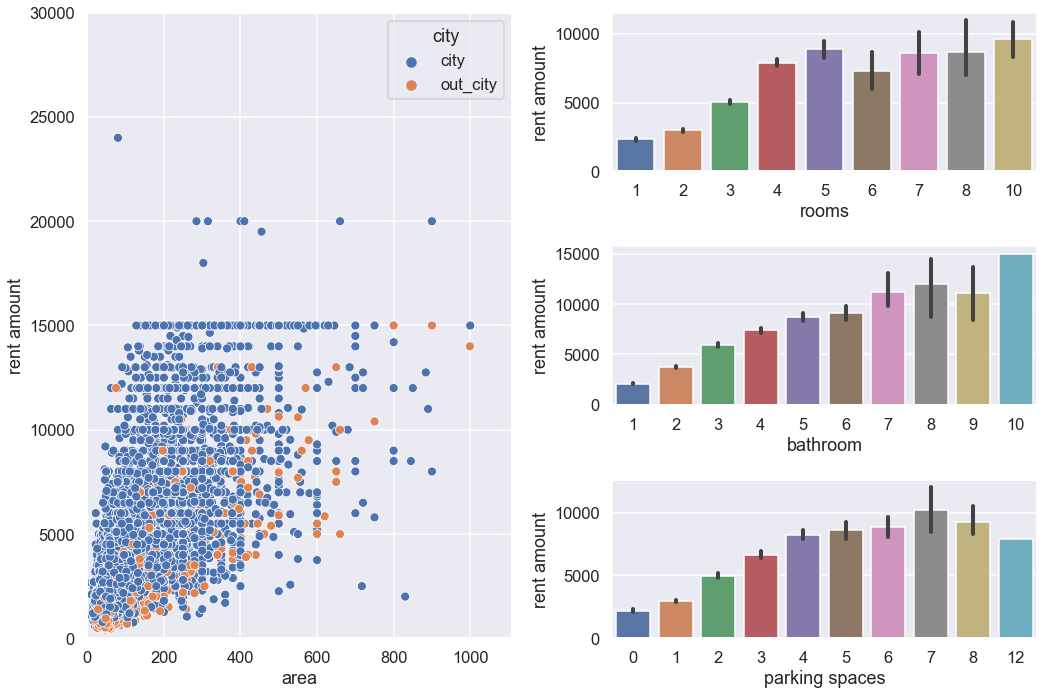

In [10]:
sns.set(style="darkgrid", context="talk")
axs = []
fig = plt.figure(figsize=(15,10))
axs.append(fig.add_subplot(1,2,1));
axs.append(fig.add_subplot(3,2,2));
axs.append(fig.add_subplot(3,2,4));
axs.append(fig.add_subplot(3,2,6));
for idx,ax in enumerate(axs,1):
    plt.tight_layout()
    if idx == 1:
        g = sns.scatterplot(x="area", y="rent amount", hue="city", data=pd_data,ax=ax)
        g.set(ylim=(0, 30000),xlim=(0,1110))
    elif idx == 2:
        sns.barplot(data=pd_data,x="rooms" ,y="rent amount",ax=ax)
    elif idx == 3:
        sns.barplot(data=pd_data, x="bathroom",y="rent amount",ax=ax)
    else:
        sns.barplot(data=pd_data,x="parking spaces", y="rent amount", ax=ax)  

# Ответ на 2 вопрос.
Да, безусловно характеристика жилья влияет на арендную плату, то есть, чем больше имеет комнат жилье, тогда соответственно оплата за его аренду будет выше.
Если посмотреть на графики, то можно заметить эту тенденцию. 
Например, за трёхкомнатное жилье люди платят около 5000 ,а за четырёхкомнатную около 8000.
С площадью такая же ситуация, чем больше квадратура,тем выше его аренда.

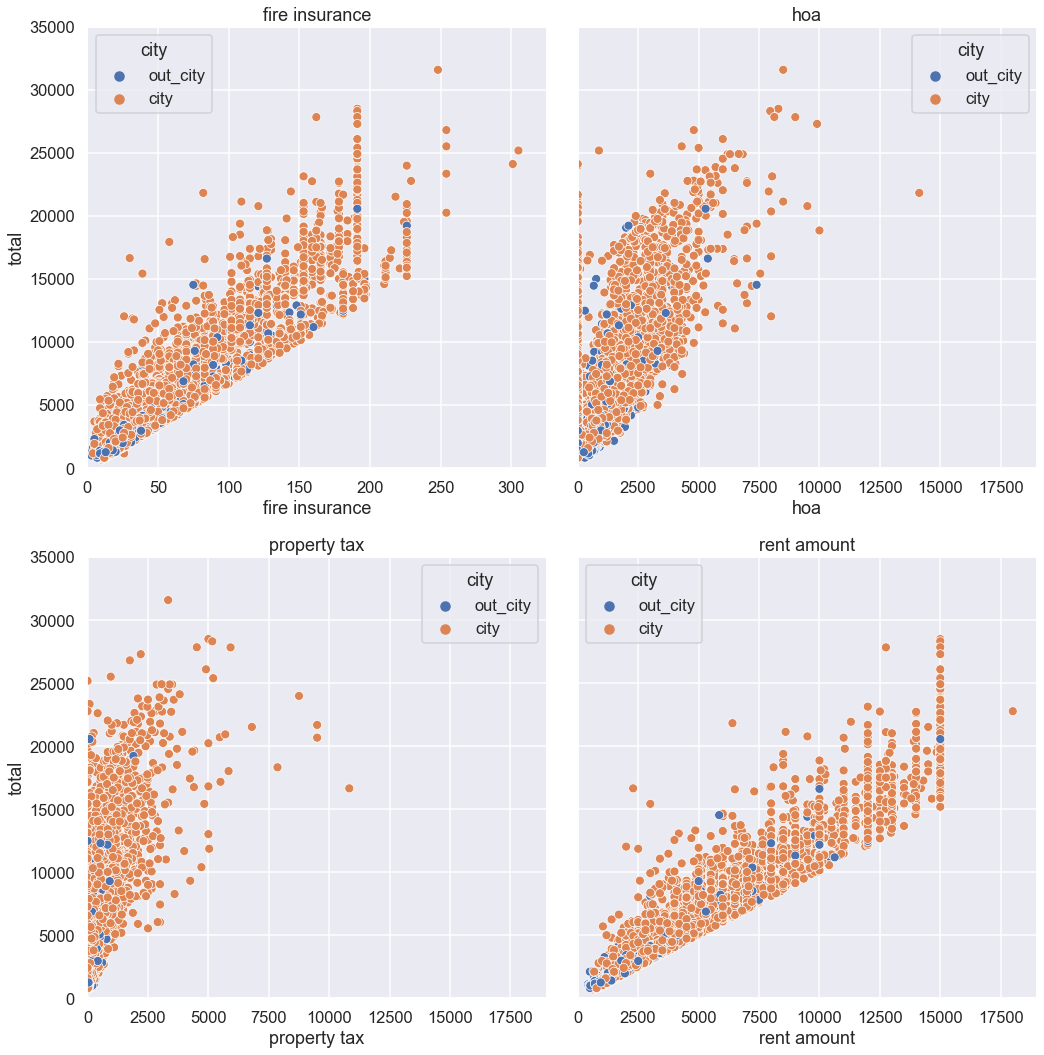

In [11]:
index = 0
columns = ["fire insurance", "hoa","property tax", "rent amount"]
fig, axs = plt.subplots(2, 2, figsize=(15,15), sharey=True)
for row in range(2):
    for col in range(2):
        plt.tight_layout()
        if columns[index] == "fire insurance":
            sns.scatterplot(x=columns[index], y="total", data=pd_data, hue="city", hue_order=["out_city", "city"],ax=axs[row][col])
            axs[row][col].axis(xmin=0, xmax=325, ymin=0, ymax=35000)
            axs[row][col].set_title(columns[index])
            axs[row][col].set_title(columns[index])
        else:
            sns.scatterplot(x=columns[index], y="total", data=pd_data, hue="city",hue_order=["out_city","city"],ax=axs[row][col])
            axs[row][col].axis(xmin=-10, xmax=19000, ymin=0, ymax=35000)
            axs[row][col].set_title(columns[index])
        index = index + 1

# Ответ на 3 вопрос
Влияние страхования и налога на общую цену жилья очень высокое. Это можно увидеть по графику, чем выше  страховка дома, 
тем выше цена.

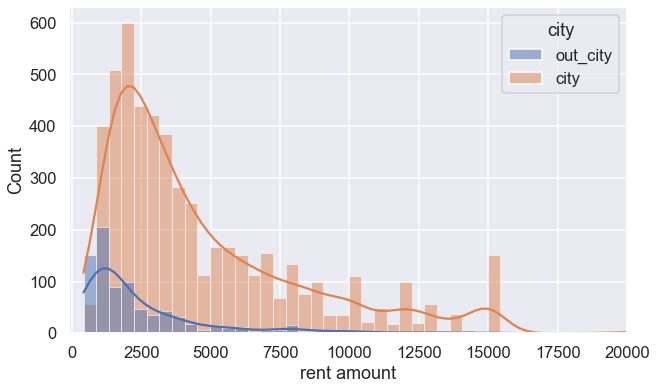

In [12]:
plt.figure(figsize=(10,6))
sns.histplot(data=pd_data, x="rent amount", hue="city", hue_order=["out_city","city"], kde=True)
plt.xlim(-100,20000);

# Ответ на 4 вопрос
Спрос на арендное жилье выше в городе, чем за городом.
Цены на арендное жилье ворируется от 1000 до 5000 долларов в городе, а за городом от 500 до 2500.

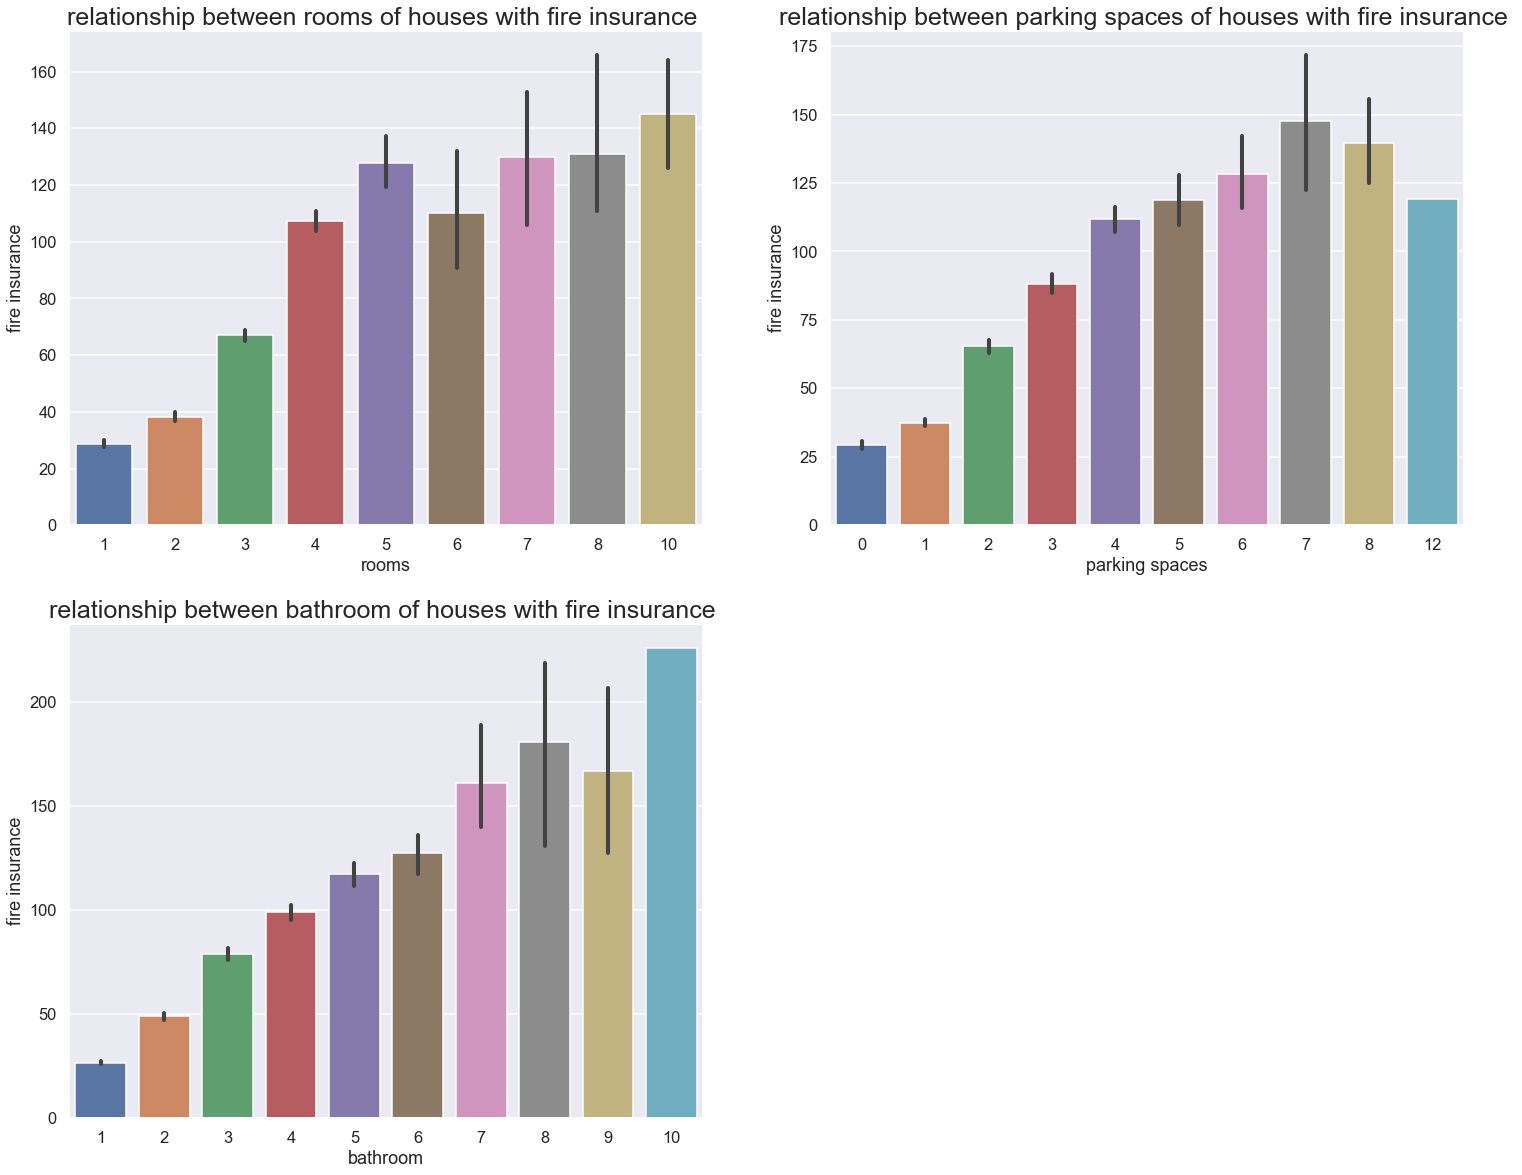

In [13]:
columns = ["rooms", "bathroom","parking spaces"]
index = 0
fig, axs = plt.subplots(2,2, figsize=(25,20))
fig.delaxes(axs[1,1])
for row in range(2):
    for col in range(2):
        sns.barplot(x=columns[index], y="fire insurance",data=pd_data, ax=axs[row][col])
        axs[row][col].set_title(f"relationship between {columns[index]} of houses with fire insurance ", fontsize=25)
        index = index - 1

# ответ на 5 вопрос
Чем больше количество комнат жилья, тем дороже стоит страхования от пожара.

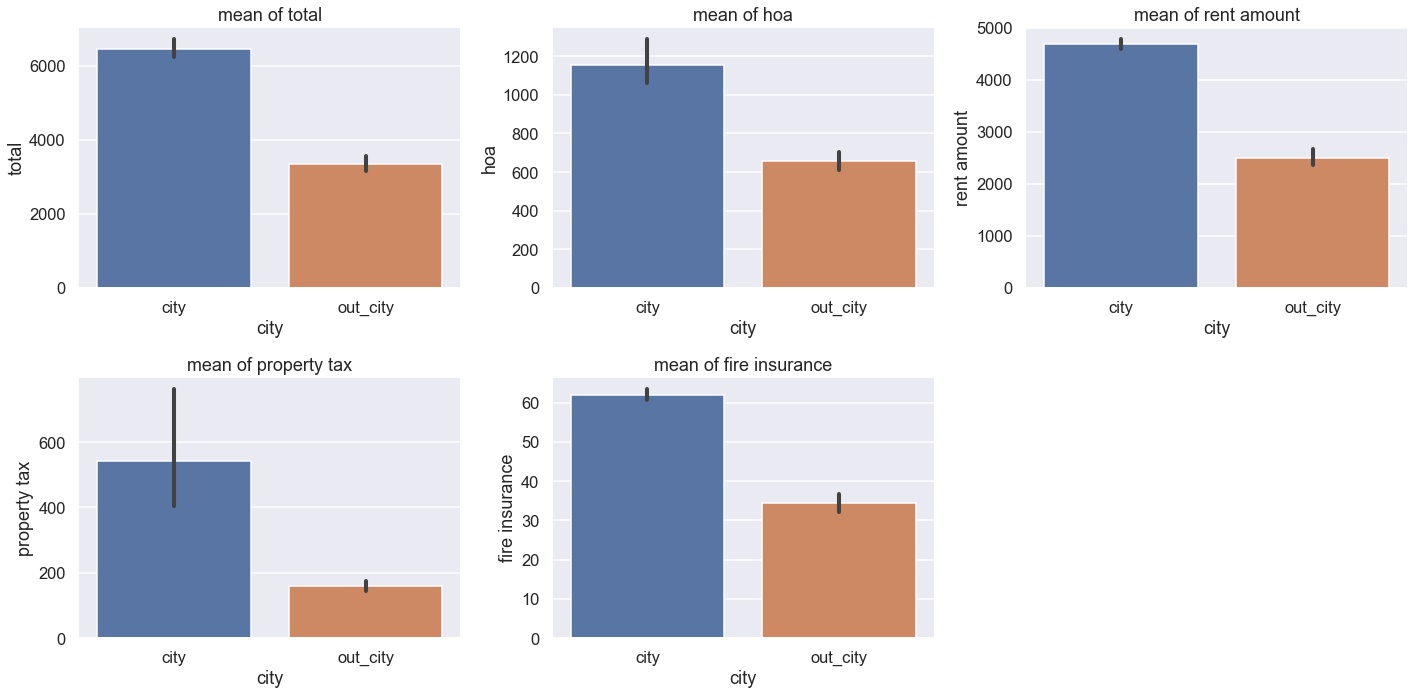

In [14]:
insurance = pd_data.columns[8:].tolist()
index = 0
fig, axs = plt.subplots(2,3, figsize=(20,10))
fig.delaxes(axs[1,2])
for row in range(2):
    for col in range(3):
        if index <= len(insurance):
            plt.tight_layout()
            sns.barplot(x="city", y=insurance[index-1], data=pd_data, ax=axs[row][col]).set_title(f"mean of {insurance[index-1]}")
        index += 1

# Ответ на 6 вопрос
Жизнь в городе в 2 раза дороже, чем за городом.

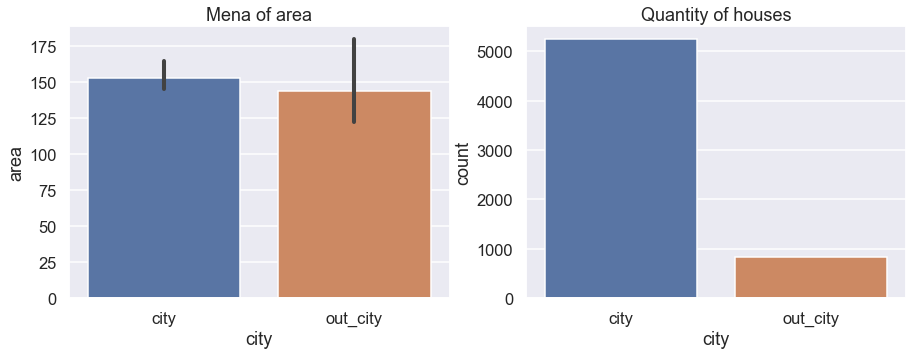

In [15]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.barplot(x="city", y="area", data=pd_data, ax=axs[0]).set_title("Mena of area")
sns.countplot(x="city", data=pd_data, ax=axs[1]).set_title("Quantity of houses");

# Ответ на 7 и 8 вопрос
Средняя площадь домов в городе и за городом окола 150 м2, но при этом количество домов в городе больше  в 5 раз

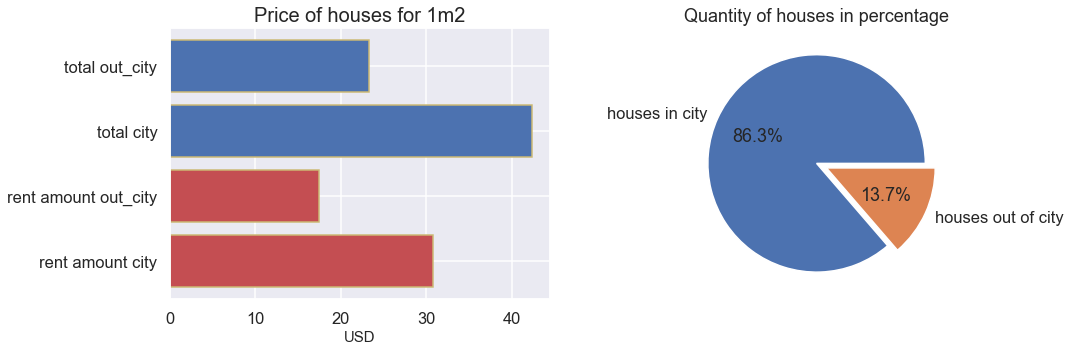

In [16]:
dict_price_1m2 = {}
for price in pd_data.columns.tolist():
    if price == "rent amount" or price == "total":
        for location in pd_data["city"].unique().tolist():
            all_area = pd_data[pd_data["city"] == location]["area"].sum()
            all_price = pd_data[pd_data["city"] == location][price].sum()
            price_area_1m2 = all_price / all_area
            dict_price_1m2[f"{price} {location}"] = price_area_1m2
series_price_1m2 = pd.Series(dict_price_1m2)

quantity_houses_city = pd_data[pd_data["city"] == "city"]["city"].count()  # код для plt.pie
quantity_houses_out_city = pd_data[pd_data["city"] == "out_city"]["city"].count() # # код для plt.pie

fig, axs = plt.subplots(1,2, figsize=(15,5))
axs[0].barh(y=series_price_1m2.index, width=series_price_1m2.values, color=["r","r","b","b"], edgecolor="y");
axs[0].set_title("Price of houses for 1m2", fontsize=20);
axs[0].set_xlabel("USD", fontsize=15)

axs[1].pie(x=[quantity_houses_city,quantity_houses_out_city], labels=["houses in city", "houses out of city"],
           autopct= '%1.1f%%', explode=[0,0.1]);
axs[1].set_title("Quantity of houses in percentage");

# ответ на вопрос 9
Аренда жилья за 1м2 в городе около 32 долларов, а за городом 18 долларов.

Общая цена за 1м2 в городе 42 долларов, а за городом 24 долларов.

In [17]:
def count_rooms(data=None, room=None, figsize=(15,5)):
    fig,axs = plt.subplots(1,2, figsize=figsize)
    sns.countplot(x=room, data=data[data["city"] == "city"], ax=axs[0]).set(title=f"Quantity of {room} in city")
    sns.countplot(x=room, data=data[data["city"] == "out_city"], ax=axs[1]).set(title=f"Quantity of {room} in out of city")
    plt.figure(figsize=(18,10))
    sns.countplot(x=room, data=data, hue="city").set_title(f"Compare {room} of houses  between in city with out of city", fontsize=20)

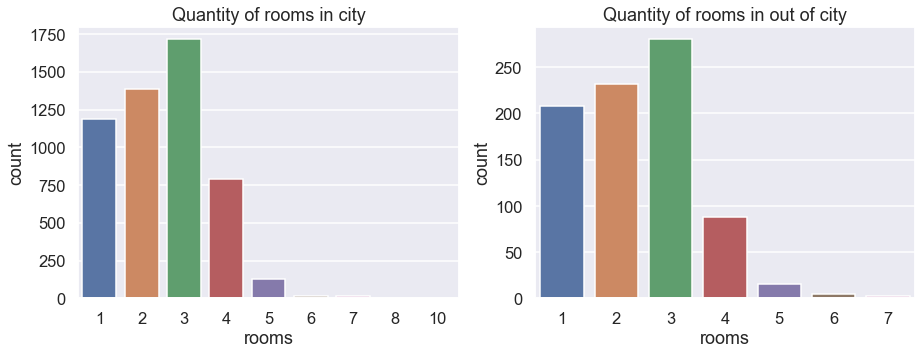

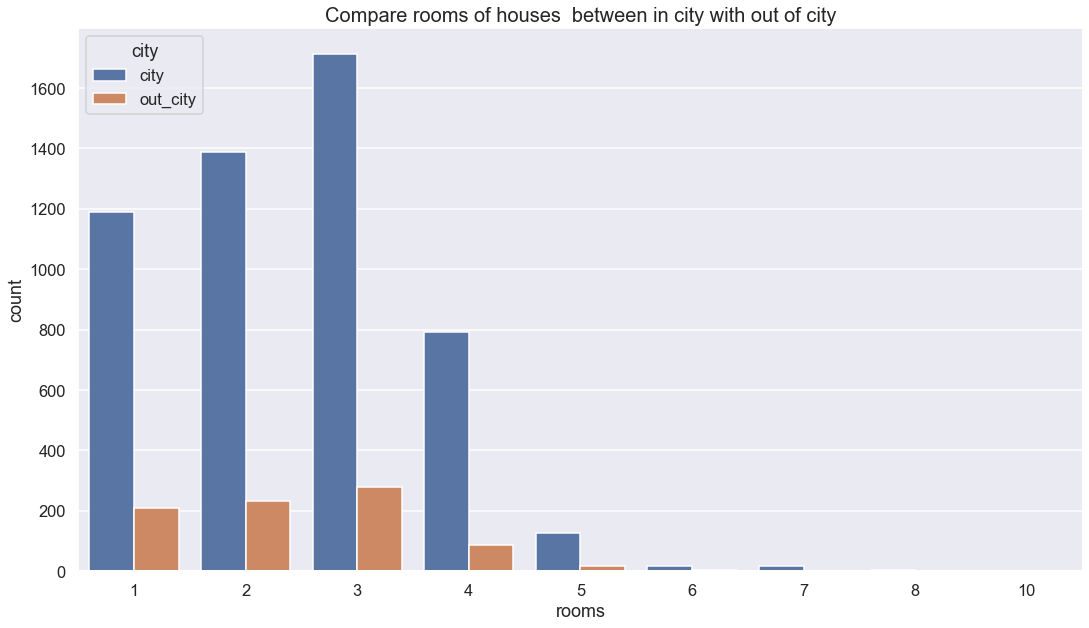

In [18]:
count_rooms(data=pd_data, room="rooms")

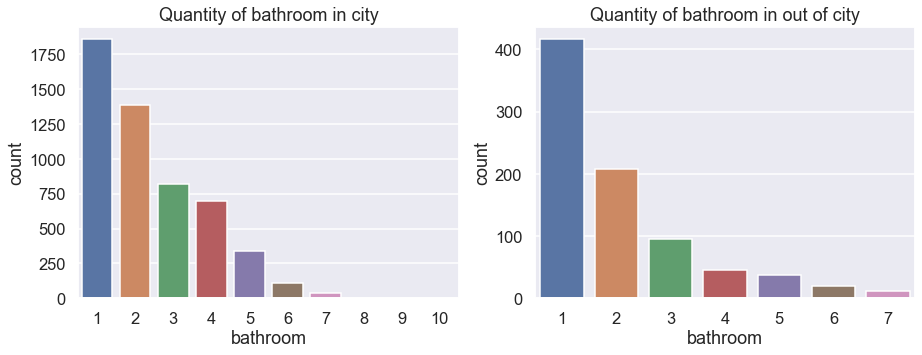

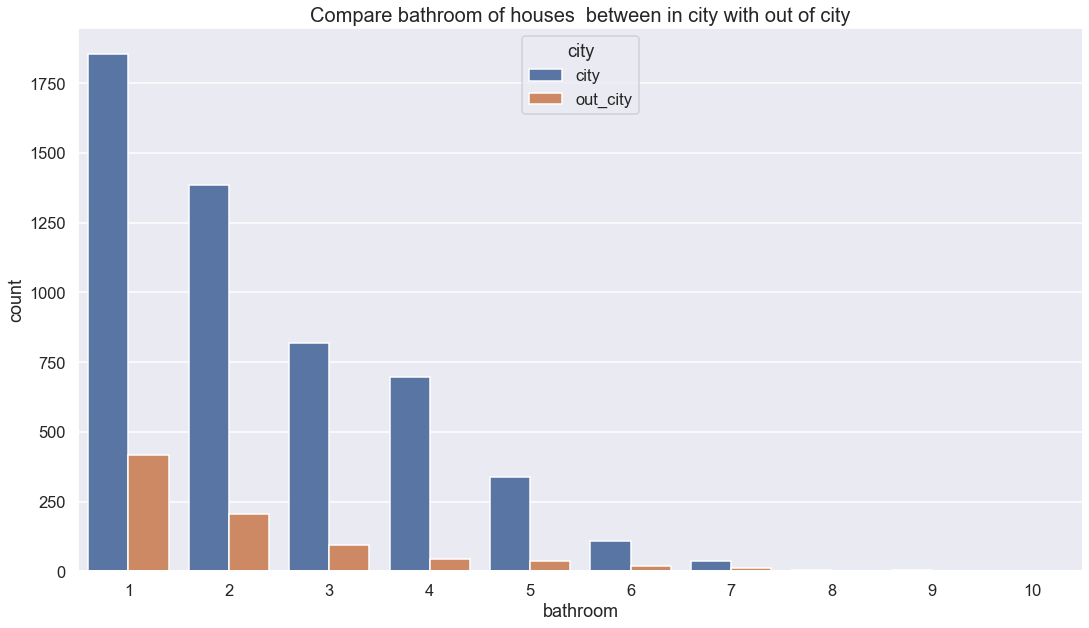

In [19]:
count_rooms(data=pd_data, room="bathroom")

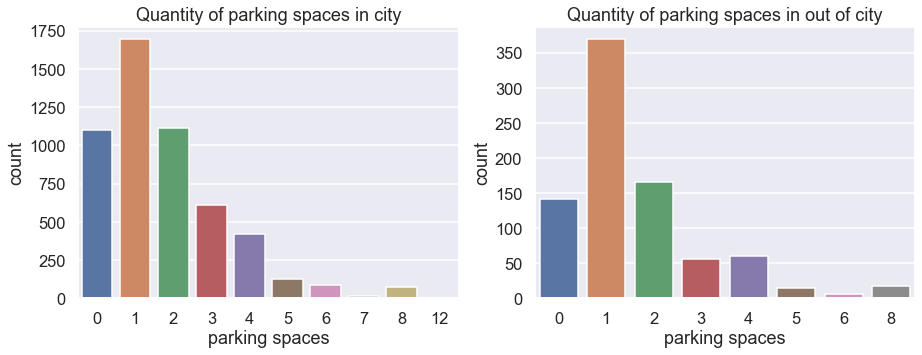

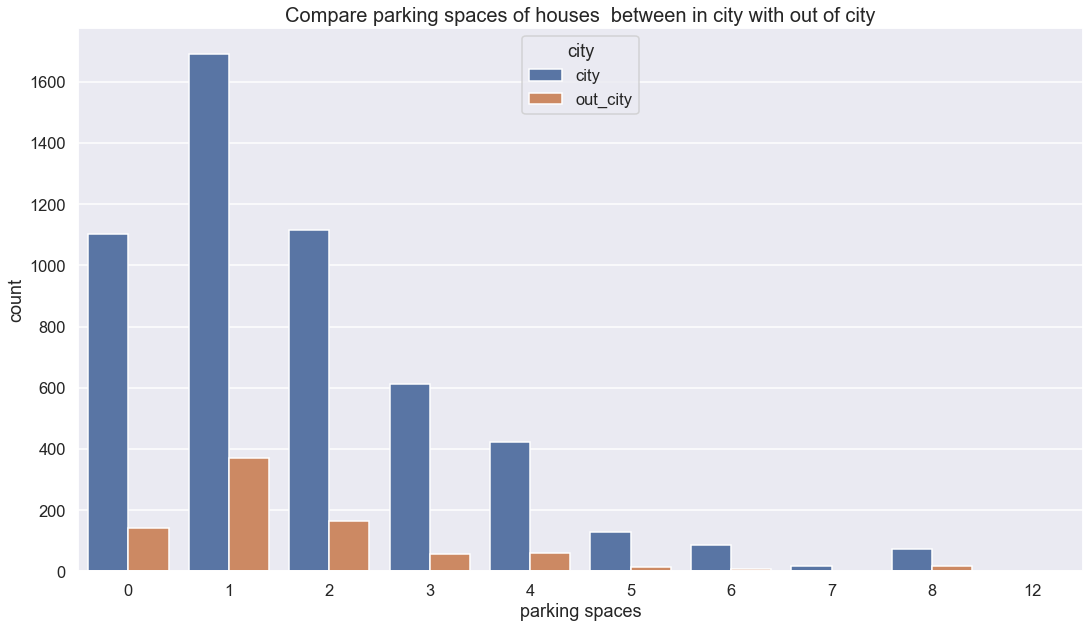

In [20]:
count_rooms(data=pd_data, room="parking spaces")

# Ответ на 10 вопрос
По графику можно определить количество комнат домов.